In [1]:
import cv2

import numpy as np
import matplotlib.pyplot as plt

# Load YOLO

net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

classes = []

# in classes you can specify objects that you want to detect

# classes = ['car', 'person', 'bicycle']

with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

print(classes)
print(len(classes))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [2]:
# Loading classes from coco file
layer_names = net.getLayerNames()

output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]

# with output layer we get detection of objects.

colors = np.random.uniform(0, 255, size=(len(classes), 3))

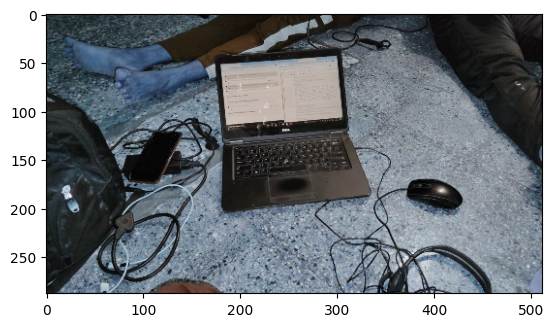

In [3]:
# Loading image
img = cv2.imread('Image.jpg')

# Resizing the image
img = cv2.resize(img, None, fx = 0.4, fy = 0.4)

# None refers to no fixed size. fx and fy are width and height
height, width, channels = img.shape

plt.imshow(img);

In [4]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0,0,0), True, crop = False)
# In the above code, True refers to converting into rgb format since opencv uses bgr.

net.setInput(blob)
# Passing blob image to yolo algo in network

outs = net.forward(output_layers)
# Giving network to output layer for final result.

In [5]:
# Showing info on the screen.

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence>0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * width)
            # Rectangle coordinates
            x = int(center_x-w/2)
            y = int(center_y-h/2)
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [6]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# NPS - nonmax Suppression

font  = cv2.FONT_HERSHEY_PLAIN

for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x,y), (x + w, y + h), color, 2)
        # Draw rectangle around boxes. '2' is the width of box.
        cv2.putText(img, label, (x, y+30), font, 3, color, 3)
        # Text in box to label the object.

In [7]:
cv2.imshow('Image', img)
cv2.waitKey(0)
# waitkey stops the output
cv2.destroyAllWindows()

In [8]:
video = cv2.VideoCapture(0)

while True:
    ret, frame = video.read()
    height, width, channels = frame.shape
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0,0,0), True, crop = False)
    net.setInput(blob)
    outs = net.forward(output_layers)
    
    class_ids = []
    confidences = []
    boxes = []
    
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence>0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * width)
                # Rectangle coordinates
                x = int(center_x-w/2)
                y = int(center_y-h/2)
                boxes.append([x,y,w,h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[i]
            cv2.rectangle(frame, (x,y), (x+w, y+h), color, 2)
            cv2.putText(frame, label, (x, y+30), font, 3, color, 2)
    
    cv2.imshow('livecam', frame)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
video.release()
cv2.destroyAllWindows()